<a href="https://colab.research.google.com/github/Mos-start2092/MLP/blob/main/%EC%BC%80%EB%9D%BC%EC%8A%A4%EB%A1%9C_%EB%8B%A4%EC%B8%B5_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 4.3MB 58.2MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 501kB 59.0MB/s 


# 새 섹션

In [ ]:
from tensorflow import keras

In [ ]:
tf.__version__

'2.0.0-rc1'

In [ ]:
keras.__version__

'2.2.4-tf'

## 10.2 시퀀셜 API를 사용하여 이미지 분류기 만들기

In [ ]:
# 데이터 적재 
# MNIST 사용
import warnings
warnings.filterwarnings(action='ignore')

fashion_mnist=keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#사이킷런에서는 1x784(28*28)이지만
# 케라스에서는 28x28 2d 배열이다

print(X_train_full.shape,X_train_full.dtype)

(60000, 28, 28) uint8


In [ ]:
# 검증데이터 세트생성
# 경사하강법으로 신경망을 훈련하기 때문에 scaling을 해준다
X_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.0

In [ ]:
# 패션이 경우 레이블에 해당하는 아이템을 나타내기 위해 클래스 이름의 리스트를 만들어야한다
class_names=["T-shirt/top",'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


In [ ]:
#예를 들어 훈련세트에 있는 첫 번째 이미지는 코트를 나타냄
class_names[y_train[0]]

'Coat'

시퀀셜 API를 사용하여 모델 생성

In [ ]:
#두개의 은닉층으로 이루어진 분류용 MLP 생성
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation='softmax'))


In [ ]:
# 층을 추가하지 않고 Sequential 모델 만들 때 층의 리스츠를 전달할 수 있음.
model=keras.models.Sequential([
                               keras.layers.Flatten(input_shape=[28,28]),
                               keras.layers.Dense(300,activation='relu'),
                               keras.layers.Dense(100,activation='relu'),
                               keras.layers.Dense(10,activation='softmax')

])

In [ ]:
#keras.io의 예제 코드 사용하기
from tensorflow.keras.layers import Dense
output_layer=Dense(10)


In [ ]:
# 모델의 summary()메서드는 모델에 있는 모든 층을 출력한다.
model.summary()


# 첫 은닉층 : 784x300(연결 가중치) + 300(편향)=235500개의 파라미터
# 이런 모델은 훈련 데이터를 학습하기 충분한 유연성을 가짐.
# 과대적합의 위험을 가지기도 함

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델에 있는 층의 리스트를 출력하거나 인덱스로 층을 쉽게 선택할 수 있다. 또는 이름으로 층 선택 가능
model.layers

In [ ]:
hidden1=model.layers[1]
hidden1.name

'dense_3'

In [ ]:
# get_weights() 메서드와 set_weights()메서드를 사용해 접근할 수 있다. 가중치와 편향치
weights, biases=hidden1.get_weights()
weights

array([[ 0.03240326,  0.06705241,  0.01226452, ...,  0.05629912,
         0.03983603,  0.04573331],
       [-0.04065917,  0.06266241,  0.05648936, ..., -0.00771797,
        -0.02199519,  0.03223167],
       [-0.01088338,  0.05779622, -0.0014146 , ...,  0.04825817,
        -0.02987025, -0.00707364],
       ...,
       [-0.03958642, -0.06106831, -0.03232348, ...,  0.05673893,
         0.01906604,  0.04006682],
       [ 0.02721345, -0.0549747 ,  0.06034127, ..., -0.0203698 ,
         0.0236541 , -0.05819852],
       [ 0.05606693,  0.04361872, -0.0298212 , ...,  0.02182773,
        -0.06127194, -0.07274392]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
print(biases,biases.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] (300,)


#### 모델 컴파일
모델을 만들고 나서 compile()메서드를 호출하여  사용할 손실 함수와 옵티마이저를 지정해야함. 부가적으로 훈련과 평가 시에 계산할 지표를 추가로 지정가능

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

#### 모델 훈련과 평가

In [ ]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 127us/sample - loss: 0.7221 - accuracy: 0.7624 - val_loss: 0.5590 - val_accuracy: 0.7990
Epoch 2/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.4930 - accuracy: 0.8279 - val_loss: 0.4560 - val_accuracy: 0.8458
Epoch 3/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.4465 - accuracy: 0.8433 - val_loss: 0.4231 - val_accuracy: 0.8586
Epoch 4/30
55000/55000 [==============================] - 5s 86us/sample - loss: 0.4199 - accuracy: 0.8528 - val_loss: 0.4146 - val_accuracy: 0.8614
Epoch 5/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.3987 - accuracy: 0.8593 - val_loss: 0.3798 - val_accuracy: 0.8670
Epoch 6/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.3801 - accuracy: 0.8655 - val_loss: 0.3711 - val_accuracy: 0.8712
Epoch 7/30
55000/55000 [==============================] 

In [ ]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.722062,0.762364,0.558980,0.7990
1,0.492965,0.827927,0.456003,0.8458
2,0.446504,0.843273,0.423094,0.8586
3,0.419943,0.852782,0.414638,0.8614
4,0.398718,0.859309,0.379751,0.8670
5,0.380136,0.865455,0.371121,0.8712
6,0.366022,0.870436,0.358046,0.8742
7,0.352863,0.874164,0.366460,0.8714
8,0.343685,0.876891,0.355514,0.8756
9,0.333556,0.880636,0.342319,0.8780


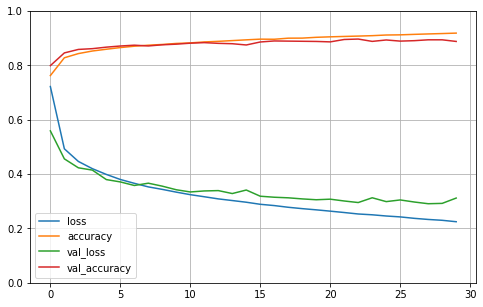

In [ ]:
# dictionary를 활용하여 학습곡선 살펴보기
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True) #grid=격자
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# test
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.34379034612178805, 0.8801]

#### 모델을 사용해 예측을 만들기
그다음 모델의 predict() 메서드를 사용해 새로운 샘플에 대해 예측 생성 가능

In [ ]:
# 각 샘플에 대해 0에서 9까지 클래스마다 각각의 확률을 모델이 추정함
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
# 예측 클래스
import numpy as np

y_pred=model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## 10,2.3 시퀀셜 API를 사용하여 회귀용 MlP 생성하기

In [ ]:
#sklearn의 캘리포니아 주택 가격 데이터 사용

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing=fetch_california_housing()

X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [ ]:
# 데이터에 잡음이 많기 때문에 과대적합을 막는 용도로 뉴런 수가 적은 은닉층 하나만 사용
model=keras.models.Sequential([
                               keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
                               keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error",optimizer='sgd')
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3] #새로운 샘플이라고 생각
y_pred=model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 106us/sample - loss: 0.9574 - val_loss: 4.5260
Epoch 2/20
11610/11610 [==============================] - 1s 88us/sample - loss: 1.9511 - val_loss: 0.5380
Epoch 3/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4265 - val_loss: 0.5515
Epoch 4/20
11610/11610 [==============================] - 1s 91us/sample - loss: 0.4216 - val_loss: 0.4027
Epoch 5/20
11610/11610 [==============================] - 1s 89us/sample - loss: 0.3810 - val_loss: 0.3930
Epoch 6/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.3736 - val_loss: 0.3842
Epoch 7/20
11610/11610 [==============================] - 1s 88us/sample - loss: 0.3671 - val_loss: 0.3837
Epoch 8/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.3628 - val_loss: 0.3804
Epoch 9/20
11610/11610 [==============================] - 1s 87us/sample - loss: 0.3634 - val_

## 10.2.4 함수형 API를 사용해 복잡한 모델 만들기